In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy as sc
from datetime import datetime
print("Done")

Done


In [3]:
l0 = 0.11
l0e = 0.001
d0 = 0.012
d0e = 0.0005
h0 = 0.00175
h0e = 0.00005
rho = 1.2
le = 0.005

In [11]:
data1 = pd.read_csv("../data/data1.csv")
data1["L"] /= 100
data1["F"] = data1["m"] * 9.8155 / 1000
data1["lamb"] = data1["L"] / l0
data1

,L,m,F,lamb
0,0.148,287.8,2.824901,1.345455
1,0.152,389.6,3.824119,1.381818
2,0.157,466.0,4.574023,1.427273
3,0.162,567.8,5.573241,1.472727
4,0.168,744.6,7.308621,1.527273
5,0.171,813.0,7.980002,1.554545
6,0.176,846.4,8.307839,1.600000
7,0.183,919.4,9.024371,1.663636
8,0.190,989.7,9.714400,1.727273
9,0.194,1021.2,10.023589,1.763636


11.655498117886086 0.9244366833973953
555023.7198993375 83004.60334518658


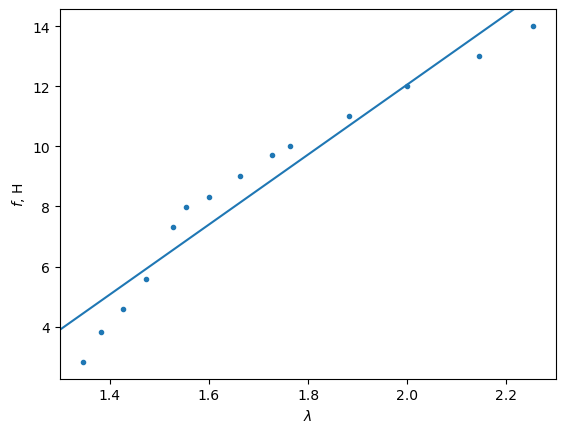

In [10]:
x = data1["lamb"]
y = data1["F"]
pp, V = np.polyfit(x, y, 1, cov=True)
k, b = pp
ke, be = np.sqrt(V[0][0]), np.sqrt(V[1][1])
print(k, ke)
plt.plot(x, y, '.')
plt.axline((1.5, 1.5 * k + b), (2.0, 2.0 * k + b))
E = k / d0 / h0
Ee = E * (ke / k + d0e / d0 + h0e / h0)
print(E, Ee)
plt.ylabel("$f$, Н")
plt.xlabel("$\lambda$")
plt.savefig("lol.png")

8.509120295693366 0.9244366833973953
1215588.6136704807 217443.01215981643


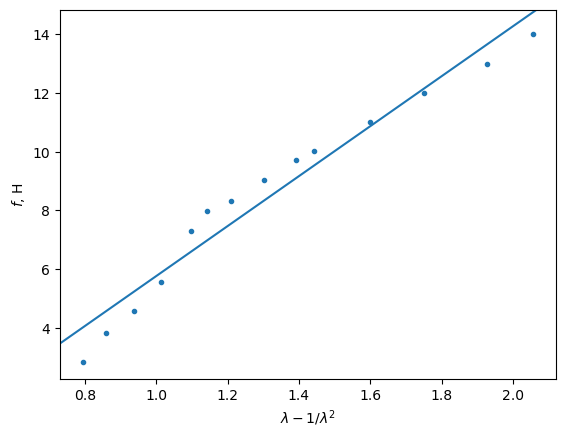

In [12]:
x = data1["lamb"] - 1 / data1["lamb"] ** 2
y = data1["F"]
pp, V = np.polyfit(x, y, 1, cov=True)
k, b = pp
k_err, b_err = np.sqrt(V[0][0]), np.sqrt(V[1][1])
print(k, ke)
plt.plot(x, y, '.')
plt.axline((1.5, 1.5 * k + b), (2.0, 2.0 * k + b))
E = k / d0 / h0 * 3
Ee = E * (ke / k + d0e / d0 + h0e / h0)
print(E, Ee)
plt.ylabel("$f$, Н")
plt.xlabel("$\lambda-1/\lambda^2$")
plt.savefig("kek.png")

In [6]:
def work(lamb):
    return h0 * d0 * E * l0 / 3 * (lamb ** 2 / 2 + 1 / lamb - 1.5)

In [7]:
data2 = pd.read_csv("../data/data2.csv")
data2["L"] /= 100
data2["lamb"] = data2["L"]/l0
data2["A"] = work(data2["lamb"])
data2["T"] = data2["dU"] / 320
data2 = data2.drop(index=[0, 7])
data2

,L,dU,lamb,A,T
1,0.171,32.0,1.554545,0.329081,0.100000
2,0.182,55.0,1.654545,0.442875,0.171875
3,0.192,84.0,1.745455,0.558066,0.262500
4,0.207,113.0,1.881818,0.750694,0.353125
5,0.226,183.0,2.054545,1.027080,0.571875
6,0.240,216.0,2.181818,1.252839,0.675000


C = 1.5686195943173056 +/- 0.058064882814956274
c = 565.8800845300525 +/- 20.946927422422895


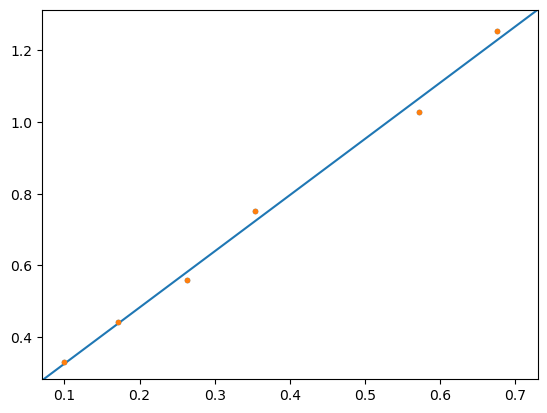

In [8]:
x = data2["T"]
y = data2["A"]
pp, V = np.polyfit(x, y, 1, cov=True)
k, b = pp
ke, be = np.sqrt(V[0][0]), np.sqrt(V[1][1])
plt.plot(x, y, '.')
plt.axline((0.5, 0.5 * k + b), (0.7, 0.7 * k + b))
plt.plot(x, y, '.')
C, Ce = k, ke
c, ce = C / 1200 / l0 / h0 / d0, Ce / 1200 / l0 / h0 / d0
print(f"C = {C} +/- {Ce}\nc = {c} +/- {ce}")

In [9]:
lamb3 = 0.184 / l0
lamb4 = 0.22 / l0

In [10]:
data3 = pd.read_csv("../data/data3.csv")
data3["T"] = data3["U"] / 320
data3

,t,U,T
0,-17.2,20,0.06250
1,-16.8,32,0.10000
2,-16.6,50,0.15625
3,-16.4,72,0.22500
4,-16.2,90,0.28125
5,-16.0,100,0.31250
6,-15.4,110,0.34375
7,-14.6,102,0.31875
8,-13.8,96,0.30000
9,-13.4,92,0.28750


In [11]:
data4 = pd.read_csv("../data/data4.csv")
data4["T"] = data4["U"] / 320
data4

,t,U,T
0,-26.0,12,0.03750
1,-25.0,16,0.05000
2,-24.2,26,0.08125
3,-24.0,52,0.16250
4,-23.8,82,0.25625
...,...,...,...
105,73.0,26,0.08125
106,74.0,26,0.08125
107,75.0,26,0.08125
108,76.0,26,0.08125


C = 1.2749598316671957 +/- 0.058064882814956274
c = 459.94221921615997 +/- 20.946927422422895


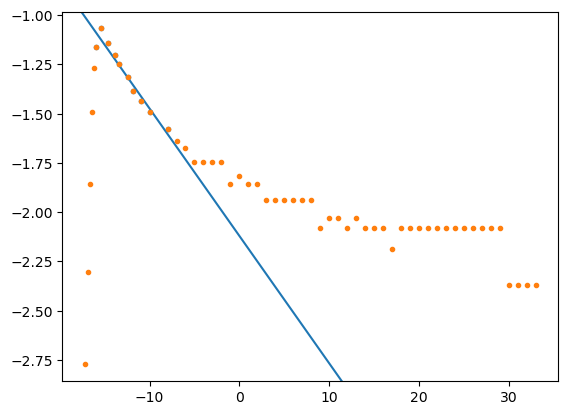

In [12]:
d = data3[5:15]
x = d["t"]
y = np.log(d["T"])
pp, V = np.polyfit(x, y, 1, cov=True)
k, b = pp
ke, be = np.sqrt(V[0][0]), np.sqrt(V[1][1])
plt.plot(x, y, '.')
plt.axline((0.5, 0.5 * k + b), (0.7, 0.7 * k + b))
plt.plot(data3["t"], np.log(data3["T"]), '.')
C = work(lamb3)/np.exp(data3["t"][0] * k + b)
C_err = work(lamb3+le/l0)/np.exp(data3["t"][0] * (k+ke) + b+be) - C
c, ce = C / 1200 / l0 / h0 / d0, Ce / 1200 / l0 / h0 / d0
print(f"C = {C} +/- {Ce}\nc = {c} +/- {ce}")

C = 1.9896867131634466 +/- 0.058064882814956274
c = 717.7801995539128 +/- 20.946927422422895


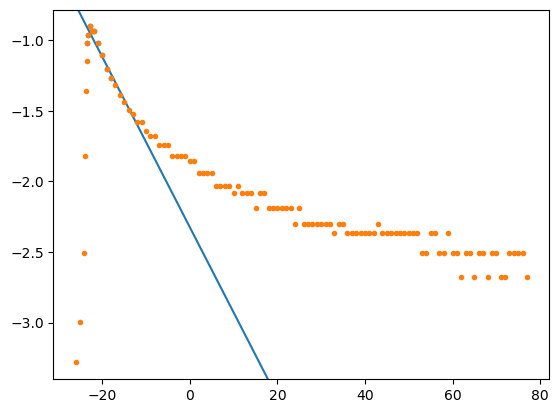

In [13]:
d = data4[6:15]
x = d["t"]
y = np.log(d["T"])
pp, V = np.polyfit(x, y, 1, cov=True)
k, b = pp
ke, be = np.sqrt(V[0][0]), np.sqrt(V[1][1])
plt.plot(x, y, '.')
plt.axline((0.5, 0.5 * k + b), (0.7, 0.7 * k + b))
plt.plot(data4["t"], np.log(data4["T"]), '.')
C = work(lamb4)/np.exp(data4["t"][0] * k + b)
C_err = work(lamb4+le/l0)/np.exp(data4["t"][0] * (k+ke) + b+be) - C
c, ce = C / 1200 / l0 / h0 / d0, Ce / 1200 / l0 / h0 / d0
print(f"C = {C} +/- {Ce}\nc = {c} +/- {ce}")

$\alpha=-\frac{C_l\Delta T}{EST\Delta l} = 7\cdot 10^{-4}$

In [ ]:
1/(1-np.exp(-1)/293)/()